In [4]:
import ctypes
import os
import threading
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
matplotlib.style.use('ggplot')
import math
import concurrent.futures
import glob
import json
import scipy as sp
import scipy.special
from matplotlib.ticker import FormatStrFormatter
from itertools import chain

# Graphs for simulation results

## Read results of multiple simulations.

In [5]:
data_mode = 'CA'

In [6]:
test_mode = 'Apr-25-2017/EEModel/RelBaseLearn08/'
test_name = 'RelBaseLearn08'

In [7]:
#names of columns in a file
names = ['N_installed', 'N_installed_sum', 'P_av_total', 'P_av']
for i in range(3):
    names.append('sei_' + str(i))
for i in range(3):
    names.append('sei_rel_' + str(i))
for i in range(7):
    names.append('sem_' + str(i))
for i in range(7):
    names.append('sem_rel_' + str(i))
for i in range(3):
    names.append('sei_N_' + str(i))


#read few files
#save into database
dfs_ = []
#read last simulation result
files = glob.glob('/Users/wilfeli/Dropbox/ABM/SolarPanels/ABMIRISLab/Saves/' + test_mode + data_mode + '/*[_w].csv')
files.sort(key=os.path.getmtime, reverse=True)



indexing_range = range(0,100)

#take top x files 
for file in [files[i] for i in indexing_range]:
    df_ = pd.read_csv(file, names=names, low_memory=False)
    
     #create new column with max and min
    df_['sem_max'] = df_[['sem_' + str(i) for i in range(7)]].max(axis=1)
    df_['sem_rel_min'] = df_[['sem_rel_' + str(i) for i in range(7)]].min(axis=1)
    df_['sei_max'] = df_[['sei_' + str(i) for i in range(3)]].min(axis=1)
    df_['sei_rel_min'] = df_[['sei_rel_' + str(i) for i in range(3)]].min(axis=1)
    
    dfs_.append(df_)

#create df from them    
df_concat = pd.concat(dfs_)
df = df_concat.groupby(level=0).mean()
df_std = df_concat.groupby(level=0).std()



In [8]:
data_mode = 'MA'

In [9]:
test_mode = 'Apr-25-2017/EEModel/RelBaseLearn08/'
test_name = 'RelBaseLearn08'

In [10]:
#names of columns in a file
names = ['N_installed', 'N_installed_sum', 'P_av_total', 'P_av']
for i in range(3):
    names.append('sei_' + str(i))
for i in range(3):
    names.append('sei_rel_' + str(i))
for i in range(7):
    names.append('sem_' + str(i))
for i in range(7):
    names.append('sem_rel_' + str(i))
for i in range(3):
    names.append('sei_N_' + str(i))


#read few files
#save into database
dfs_ma_ = []
#read last simulation result
files = glob.glob('/Users/wilfeli/Dropbox/ABM/SolarPanels/ABMIRISLab/Saves/' + test_mode + data_mode + '/*[_w].csv')
files.sort(key=os.path.getmtime, reverse=True)


indexing_range = range(0,100)

#take top x files 
for file in [files[i] for i in indexing_range]:
    df_ = pd.read_csv(file, names=names, low_memory=False)
    
     #create new column with max and min
    df_['sem_max'] = df_[['sem_' + str(i) for i in range(7)]].max(axis=1)
    df_['sem_rel_min'] = df_[['sem_rel_' + str(i) for i in range(7)]].min(axis=1)
    df_['sei_max'] = df_[['sei_' + str(i) for i in range(3)]].min(axis=1)
    df_['sei_rel_min'] = df_[['sei_rel_' + str(i) for i in range(3)]].min(axis=1)
    
    dfs_ma_.append(df_)

#create df from them    
df_ma_concat = pd.concat(dfs_ma_)
df_ma = df_ma_concat.groupby(level=0).mean()
df_ma_std = df_ma_concat.groupby(level=0).std()



### Preparing raw data

In [11]:
N_SIMULATION_TICKS = 20

In [12]:
N_TICKS_DISPLAY = 15

In [13]:
N_AGENTS_TOTAL = 1000

In [14]:
#total count of installs
#hit rate

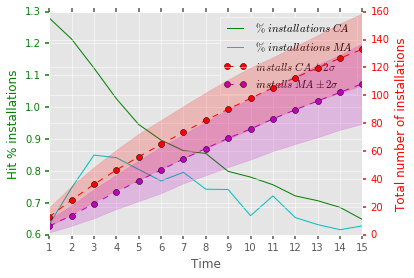

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.subplots_adjust(right=0.85)

par1 = axes.twinx()

ind = df.index.values[0:N_TICKS_DISPLAY] + 1

p1, = axes.plot(ind, df['N_installed'][0:N_TICKS_DISPLAY]/1000*100, "g-", \
#                label=r'$\%\ installations\: CA\pm 2\sigma$')
                label=r'$\%\ installations\: CA$')
p2, = par1.plot(ind, df['N_installed_sum'][0:N_TICKS_DISPLAY], "--ro", \
                label=r'$installs\: CA \pm 2\sigma$')


p3, = axes.plot(ind, df_ma['N_installed'][0:N_TICKS_DISPLAY]/1000*100, "c-", \
#                label=r'$\%\ installations\: MA\pm 2\sigma$')
                label=r'$\%\ installations\: MA$')
p4, = par1.plot(ind, df_ma['N_installed_sum'][0:N_TICKS_DISPLAY], "--mo", \
                label=r'$installs\: MA\pm 2\sigma$')


#add +- 2 std
#axes.fill_between(ind, 
#                  df['N_installed'][0:N_TICKS_DISPLAY]/1000*100-2*df_std['N_installed'][0:N_TICKS_DISPLAY]/1000*100, 
#                  df['N_installed'][0:N_TICKS_DISPLAY]/1000*100+2*df_std['N_installed'][0:N_TICKS_DISPLAY]/1000*100, 
#                  color='g', 
#                  alpha=0.2)
#axes.fill_between(ind, 
#                  df_ma['N_installed'][0:N_TICKS_DISPLAY]/1000*100-2*df_ma_std['N_installed'][0:N_TICKS_DISPLAY]/1000*100, 
#                  df_ma['N_installed'][0:N_TICKS_DISPLAY]/1000*100+2*df_ma_std['N_installed'][0:N_TICKS_DISPLAY]/1000*100, 
#                  color='c', 
#                  alpha=0.2)

par1.fill_between(ind, 
                 df['N_installed_sum'][0:N_TICKS_DISPLAY]-2*df_std['N_installed_sum'][0:N_TICKS_DISPLAY],
                 df['N_installed_sum'][0:N_TICKS_DISPLAY]+2*df_std['N_installed_sum'][0:N_TICKS_DISPLAY],
                  color='r', 
                  alpha=0.2)

par1.fill_between(ind, 
                 df_ma['N_installed_sum'][0:N_TICKS_DISPLAY]-2*df_ma_std['N_installed_sum'][0:N_TICKS_DISPLAY],
                 df_ma['N_installed_sum'][0:N_TICKS_DISPLAY]+2*df_ma_std['N_installed_sum'][0:N_TICKS_DISPLAY],
                  color='m', 
                  alpha=0.2)

axes.set_xlabel("Time")
axes.set_ylabel("Hit % installations")
par1.set_ylabel("Total number of installations")

axes.set_autoscaley_on(False)
axes.set_xlim([1,15])
start = 1
end = 16
axes.xaxis.set_ticks(np.arange(start, end, 1))

axes.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())


tkw = dict(size=4, width=1.5)
axes.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
axes.tick_params(axis='x', **tkw)

lines = [p1, p3, p2, p4]

axes.legend(lines, [l.get_label() for l in lines], fontsize='11')
plt.savefig('Simulation_results_install_CA_MA_' + '_' + test_name + '.png', dpi=300)
plt.show()